In [1]:
# info:  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

import pandas as pd

from sklearn import datasets
from sklearn.metrics import accuracy_score

# import seaborn as sns
# sns.set()

bc = datasets.load_breast_cancer()
pd.set_option('max_columns', None)
df = pd.DataFrame(bc.data, columns=bc.feature_names)
pd.concat([df.head(), df.tail()])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.4280,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [2]:
df.shape

(569, 30)

In [3]:
# 1 = malignant, 0 = benign

df['target'] = bc.target
df[['target']].shape

(569, 1)

In [4]:
# splitting training & testing sets

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(bc.data, bc.target, test_size=.2, random_state=1)

print('Training samples:', X_train.shape[0]) 
print('Testing samples:', X_test.shape[0])

Training samples: 455
Testing samples: 114


In [5]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

#training the model, n_neighbors=5 deafault
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)

print(knn_clf.predict(X_test))

print(knn_clf.score(X_train, y_train)*100, "percent accurate")

accuracy_score(y_test, knn_clf.predict(X_test))

[1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1]
95.16483516483515 percent accurate


0.9210526315789473

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, knn_clf.predict(X_test))

array([[36,  6],
       [ 3, 69]])

In [7]:
# Naive Bayes

from sklearn import naive_bayes

nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)

print(nb.predict(X_test))

print(nb.score(X_train, y_train)*100, "percent accurate")

accuracy_score(y_test, nb.predict(X_test))

[0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1]
94.06593406593406 percent accurate


0.9473684210526315

In [8]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100) #forest consist of 100 tress
rfc.fit(X_train, y_train)

print(rfc.predict(X_test))

print(rfc.score(X_train, y_train)*100, 'percent accurate')

accuracy_score(y_test, rfc.predict(X_test))

[0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]
100.0 percent accurate


0.9473684210526315

In [9]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print(dtc.predict(X_test))

print(dtc.score(X_train, y_train)*100, 'percent accurate')

accuracy_score(y_test, dtc.predict(X_test))


[1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1]
100.0 percent accurate


0.9473684210526315

[Text(802.125, 996.6, 'worst perimeter <= 106.05\ngini = 0.468\nsamples = 455\nvalue = [170, 285]\nclass = Benign'),
 Text(453.375, 815.4000000000001, 'worst concave points <= 0.159\ngini = 0.064\nsamples = 271\nvalue = [9, 262]\nclass = Benign'),
 Text(279.0, 634.2, 'worst concave points <= 0.135\ngini = 0.03\nsamples = 265\nvalue = [4, 261]\nclass = Benign'),
 Text(139.5, 453.0, 'area error <= 48.975\ngini = 0.008\nsamples = 254\nvalue = [1, 253]\nclass = Benign'),
 Text(69.75, 271.79999999999995, 'gini = 0.0\nsamples = 251\nvalue = [0, 251]\nclass = Benign'),
 Text(209.25, 271.79999999999995, 'mean area <= 469.25\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Benign'),
 Text(139.5, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Malignant'),
 Text(279.0, 90.59999999999991, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Benign'),
 Text(418.5, 453.0, 'mean texture <= 20.84\ngini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = Benign'),
 Text(348.75, 271.799

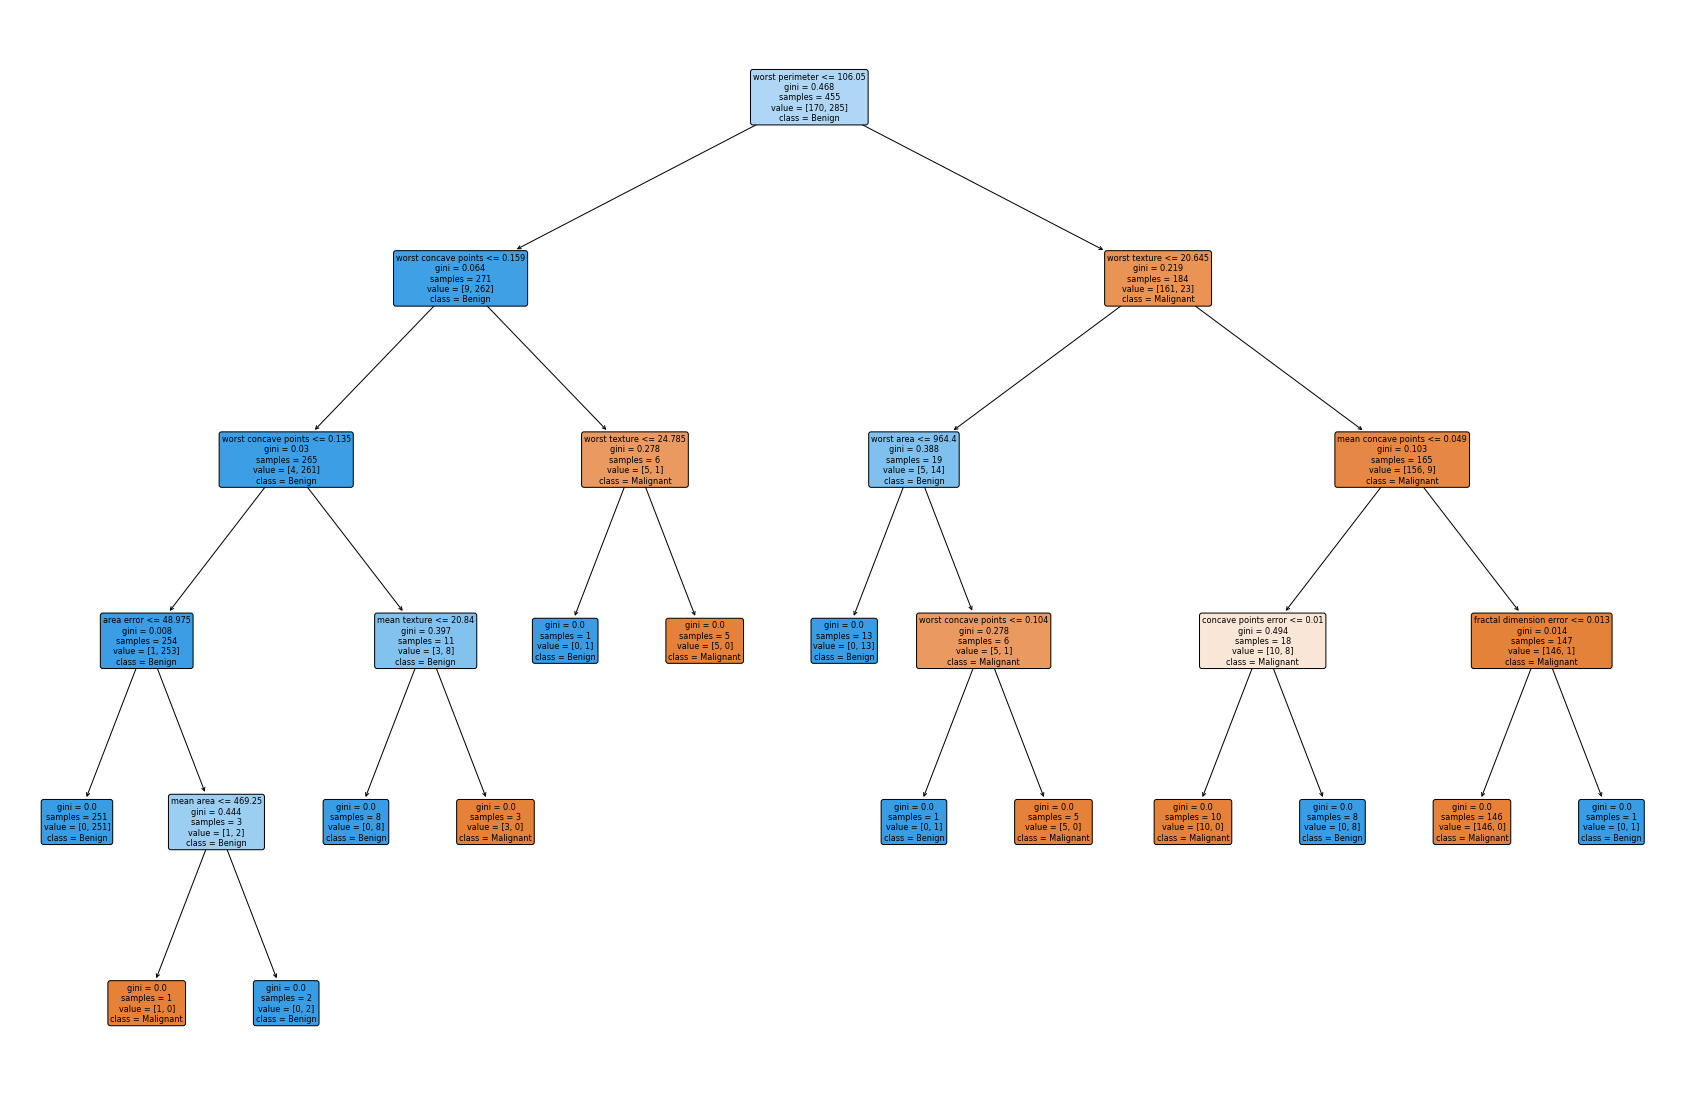

In [10]:
# plot the decision tree (training set)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
plot_tree(dtc.fit(X_train, y_train), filled = True,
            rounded = True,
            class_names = ['Malignant', 'Benign'],
            feature_names = bc.feature_names)

In [11]:
# evaluate the model performance

# test_size=.95, random_state=0
X_train,X_test, y_train,y_test = train_test_split(bc.data, bc.target, test_size=.90, random_state=0)

print('Training samples:', X_train.shape[0]) 
print('Testing samples:', X_test.shape[0])

Training samples: 56
Testing samples: 513


In [12]:
rfc = RandomForestClassifier(n_estimators=100) #forest consist of 100 tress
rfc.fit(X_train, y_train)
rfc.predict(X_test)
print("Random Forest: ", accuracy_score(y_test, rfc.predict(X_test)))


nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
nb.predict(X_test)
print("Naive Bayes: ", accuracy_score(y_test, nb.predict(X_test)))


Random Forest:  0.9395711500974658
Naive Bayes:  0.9337231968810916


In [13]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f